In [32]:
import numpy as np 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings 
warnings.filterwarnings("ignore")

## Veri yükleme ve veri manipülasyon

In [33]:
df=pd.read_csv("C:/Users/sedat/OneDrive/Masaüstü/user_behavior_dataset.csv").copy()
print(df.head(10))

   User ID        Device Model Operating System  App Usage Time (min/day)  \
0        1      Google Pixel 5          Android                       393   
1        2           OnePlus 9          Android                       268   
2        3        Xiaomi Mi 11          Android                       154   
3        4      Google Pixel 5          Android                       239   
4        5           iPhone 12              iOS                       187   
5        6      Google Pixel 5          Android                        99   
6        7  Samsung Galaxy S21          Android                       350   
7        8           OnePlus 9          Android                       543   
8        9  Samsung Galaxy S21          Android                       340   
9       10           iPhone 12              iOS                       424   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7       

In [34]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB
None
User ID                       0
Device Model                  0
Operating System      

### güzel haber ,hiç eksik verimiz yok

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,700.0,350.500000,202.216880,1.0,175.75,350.5,525.25,700.0
App Usage Time (min/day),700.0,271.128571,177.199484,30.0,113.25,227.5,434.25,598.0
Screen On Time (hours/day),700.0,5.272714,3.068584,1.0,2.50,4.9,7.40,12.0
Battery Drain (mAh/day),700.0,1525.158571,819.136414,302.0,722.25,1502.5,2229.50,2993.0
Number of Apps Installed,700.0,50.681429,26.943324,10.0,26.00,49.0,74.00,99.0
Data Usage (MB/day),700.0,929.742857,640.451729,102.0,373.00,823.5,1341.00,2497.0
Age,700.0,38.482857,12.012916,18.0,28.00,38.0,49.00,59.0
User Behavior Class,700.0,2.990000,1.401476,1.0,2.00,3.0,4.00,5.0


### User ID sutunu bilgi içermediği için silelim


In [36]:
df = df.drop("User ID", axis=1)
df.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


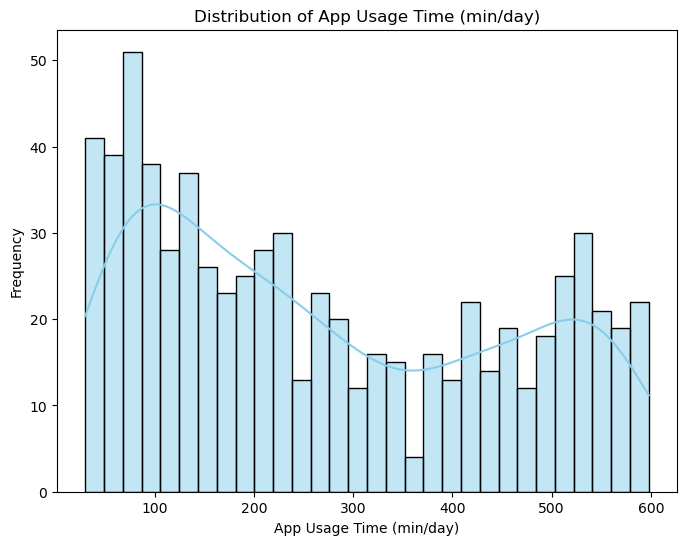

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(df['App Usage Time (min/day)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of App Usage Time (min/day)')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Frequency')
plt.show()

### Grafikte iki tepe görünmekte. Bunun, nerden kaynaklanmadığını bulalım.

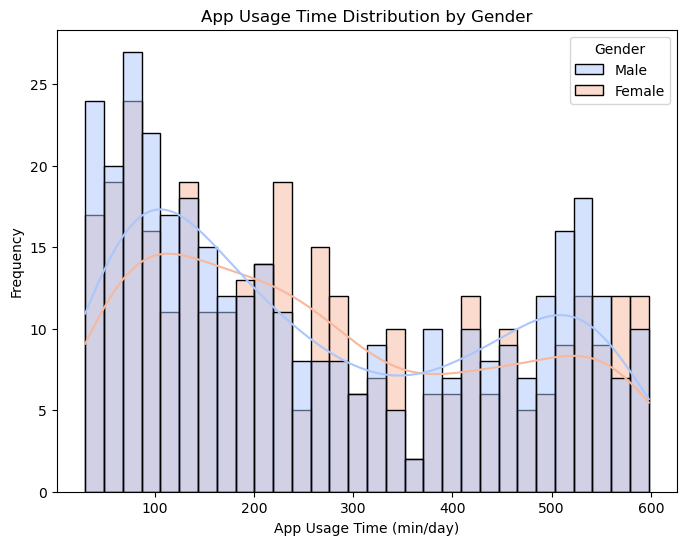

In [38]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x='App Usage Time (min/day)', hue='Gender', bins=30, kde=True, palette='coolwarm')
plt.title('App Usage Time Distribution by Gender')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Frequency')
plt.show()


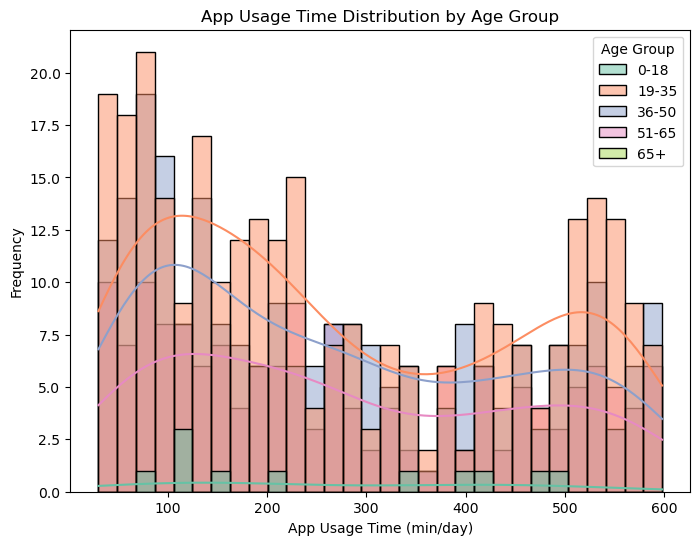

In [39]:
bins = [0, 18, 35, 50, 65, np.inf]
labels = ['0-18', '19-35', '36-50', '51-65', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
plt.figure(figsize=(8, 6))
sns.histplot(df, x='App Usage Time (min/day)', hue='Age Group', bins=30, kde=True, palette='Set2')
plt.title('App Usage Time Distribution by Age Group')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Frequency')
plt.show()
df = df.drop('Age Group',axis = 1)

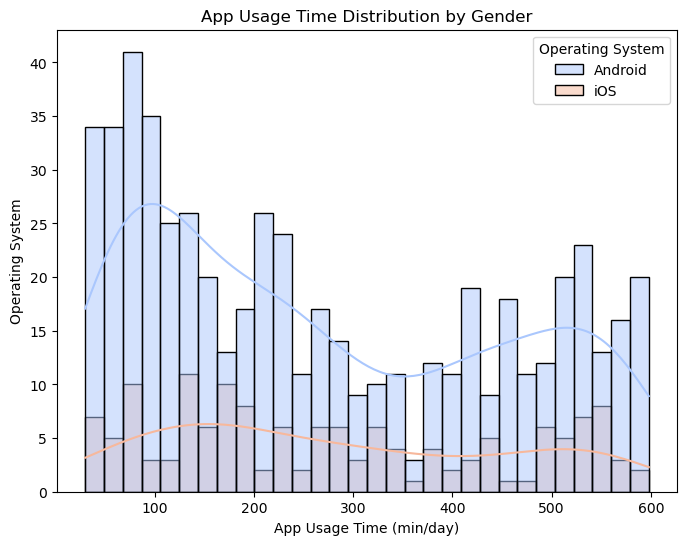

In [40]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x='App Usage Time (min/day)',hue='Operating System', bins=30, kde=True, palette='coolwarm')
plt.title('App Usage Time Distribution by Gender')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Operating System')
plt.show()


### İncelemeler sonucunda orta yaş grubundaki insanların telefonla daha az vakit geçirdiği kanısına varılmıştır

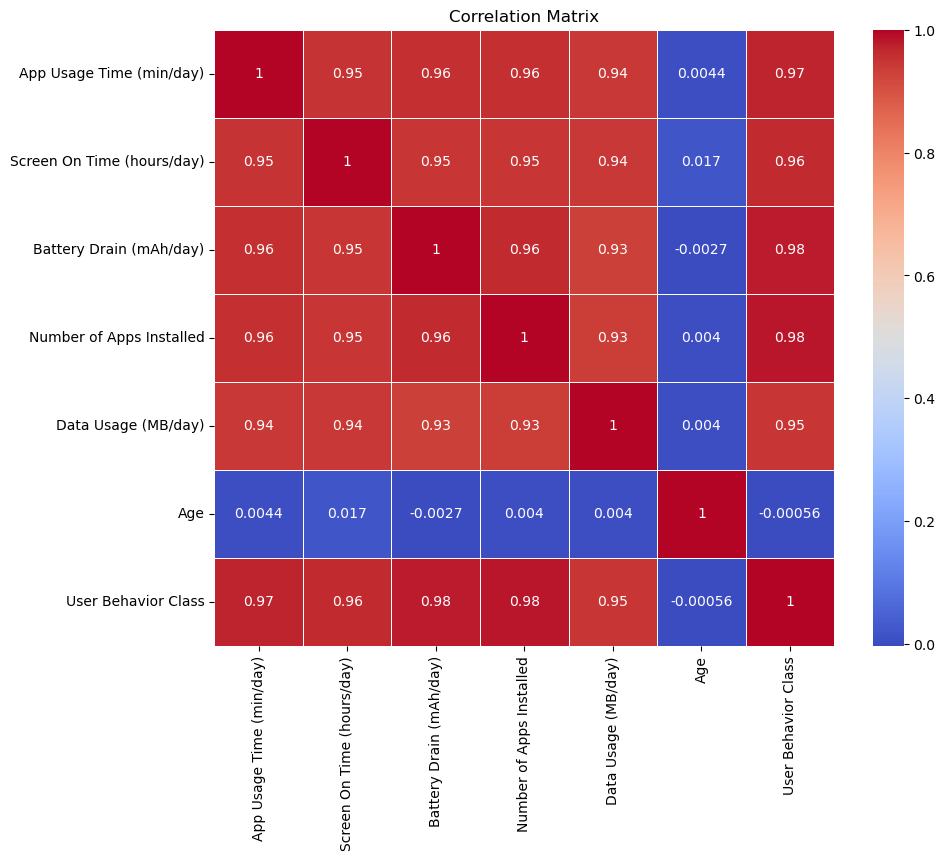

In [41]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Korelasyon matrisini görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### Yaş özelliğinin hedef değişken üzerinde neredeyse hiçbir etkisi olmadığı için bu özelliği siliyorum

In [42]:
df = df.drop("Age", axis=1)
df.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Gender,User Behavior Class
0,Google Pixel 5,Android,393,6.4,1872,67,1122,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944,Female,3
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,Male,2
3,Google Pixel 5,Android,239,4.8,1676,56,871,Male,3
4,iPhone 12,iOS,187,4.3,1367,58,988,Female,3


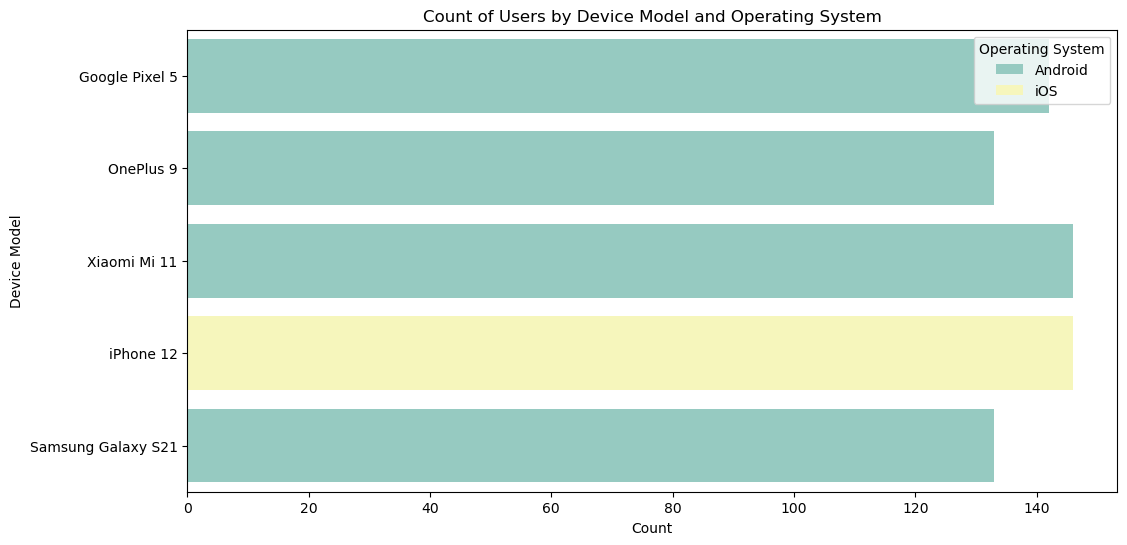

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Device Model', hue='Operating System', data=df, palette='Set3')
plt.title('Count of Users by Device Model and Operating System')
plt.xlabel('Count')
plt.ylabel('Device Model')
plt.legend(title='Operating System')
plt.show()

In [44]:
len(df[df['Operating System'] == 'iOS'])


146

### iOS kullanıcı sayısı fazla olduğu için bu özelliği silmiyorum; ancak siz projenizin amacına göre silebilirsiniz.

# StandardScaler,Onehotencoder ve veri ayırma

In [45]:
encoder=OneHotEncoder(sparse_output=False,drop='first')
one_hot_encoded=encoder.fit_transform(df[['Device Model','Operating System','Gender']])
encoded_df=pd.DataFrame(one_hot_encoded,columns=encoder.get_feature_names_out(['Device Model','Operating System','Gender']))
df_encoded=pd.concat([df,encoded_df],axis=1).drop(columns=['Device Model','Operating System','Gender'])
df_encoded

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),User Behavior Class,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System_iOS,Gender_Male
0,393,6.4,1872,67,1122,4,0.0,0.0,0.0,0.0,0.0,1.0
1,268,4.7,1331,42,944,3,1.0,0.0,0.0,0.0,0.0,0.0
2,154,4.0,761,32,322,2,0.0,0.0,1.0,0.0,0.0,1.0
3,239,4.8,1676,56,871,3,0.0,0.0,0.0,0.0,0.0,1.0
4,187,4.3,1367,58,988,3,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
695,92,3.9,1082,26,381,2,0.0,0.0,0.0,1.0,1.0,1.0
696,316,6.8,1965,68,1201,4,0.0,0.0,1.0,0.0,0.0,1.0
697,99,3.1,942,22,457,2,0.0,0.0,0.0,0.0,0.0,0.0
698,62,1.7,431,13,224,1,0.0,1.0,0.0,0.0,0.0,1.0


In [46]:
scaler=StandardScaler()
to_scale=['Battery Drain (mAh/day)','Data Usage (MB/day)','App Usage Time (min/day)']
df_encoded[to_scale]=scaler.fit_transform(df_encoded[to_scale])
df_encoded

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),User Behavior Class,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System_iOS,Gender_Male
0,0.688256,6.4,0.423726,67,0.300405,4,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.017668,4.7,-0.237198,42,0.022277,3,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.661471,4.0,-0.933550,32,-0.949607,2,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.181443,4.8,0.184279,56,-0.091787,3,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.475107,4.3,-0.193218,58,0.091028,3,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
695,-1.011609,3.9,-0.541394,26,-0.857419,2,0.0,0.0,0.0,1.0,1.0,1.0
696,0.253407,6.8,0.537341,68,0.423843,4,0.0,0.0,1.0,0.0,0.0,1.0
697,-0.972078,3.1,-0.712428,22,-0.738668,2,0.0,0.0,0.0,0.0,0.0,0.0
698,-1.181031,1.7,-1.336702,13,-1.102733,1,0.0,1.0,0.0,0.0,0.0,1.0


In [47]:
X=df_encoded.drop(columns=['User Behavior Class'])
y=df_encoded['User Behavior Class']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Model kurma

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
y_train = y_train - 1
y_test = y_test - 1

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [50]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    x_train,
    y_train,
    epochs=400,
    validation_data=(x_test, y_test),
    verbose=0,
    callbacks=[early_stopping]  
)


# Değerlendirme

In [51]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
accuracy_percentage = accuracy * 100
print(f'Model Doğruluğu: {accuracy_percentage:.2f}%')

Model Doğruluğu: 99.05%


In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_test, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        50
           3       1.00      0.96      0.98        47
           4       0.94      1.00      0.97        33

    accuracy                           0.99       210
   macro avg       0.99      0.99      0.99       210
weighted avg       0.99      0.99      0.99       210



### projenin amacına bağlı olarak bir değerlendirme yapılabilir.